# Project 3, APS1070 Summer 2020
#### **PCA -  20 points**
**Deadline: July 12, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: **Jiani Jia**
*   **Student number**: **1002226245**



In this project we are working on an up-to-date COVID19 dataset. The dataset reports the number of total cases for different countries at the end of each day.

Data url: https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv


In [ ]:
import pandas as pd
rawdf = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv',
    index_col=0,
    thousands=','
)

# Part 1: Geting started [4 Marks]

1. Plot time-series for the `US`, `China`, ` Canada`, and 17 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country.
2. Apply `StandardScalar` to the dataframe. Each day should have a `mean` of zero and `StD` of 1.
3. Plot the standardized time-series for the same countries in `step 1`.
4. Explain the trend of standardized time-series for the `US`, `Canada`, and `China`. Why does the curve goes up or down? What do negative and positive values mean? 
5. What other patterns do you see in other countries? (e.g., oscillations, monotonic increase or decrease, other trends)

In [ ]:
rawdf

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,10-May,11-May,12-May,13-May,14-May,15-May,16-May,17-May,18-May,19-May,20-May,21-May,22-May,23-May,24-May,25-May,26-May,27-May,28-May,29-May,30-May,31-May,01-Jun,02-Jun,03-Jun,04-Jun,05-Jun,06-Jun,07-Jun,08-Jun,09-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,375,375,375,375,375,375,376,381,388,391,398,423,423,423,423,423,429,434,446,446,447,448,449,451,457,464,464,464,472,473,481,485,487,489,489,492,505,514,555,600
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

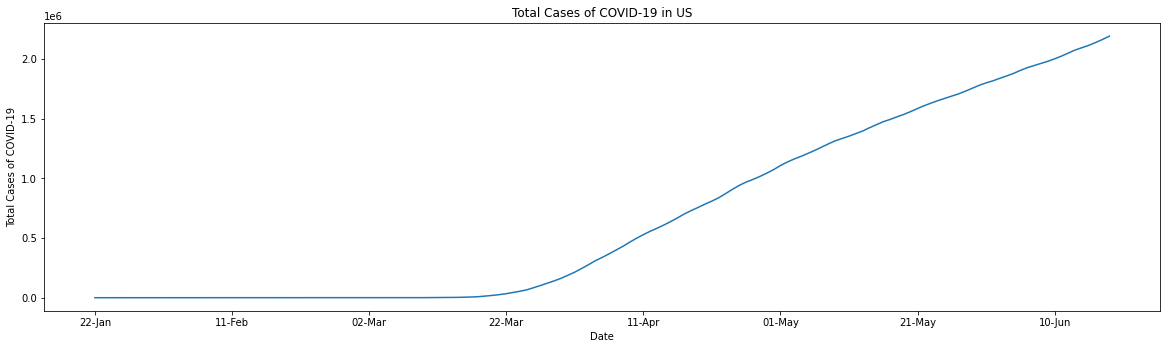

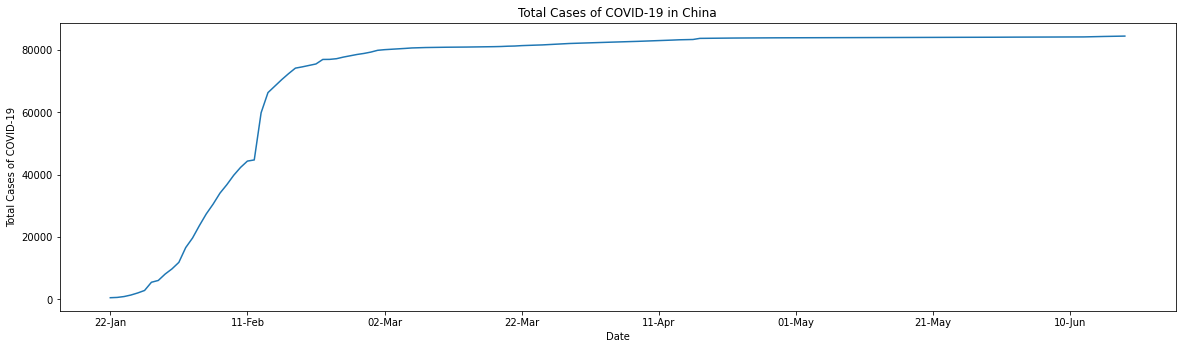

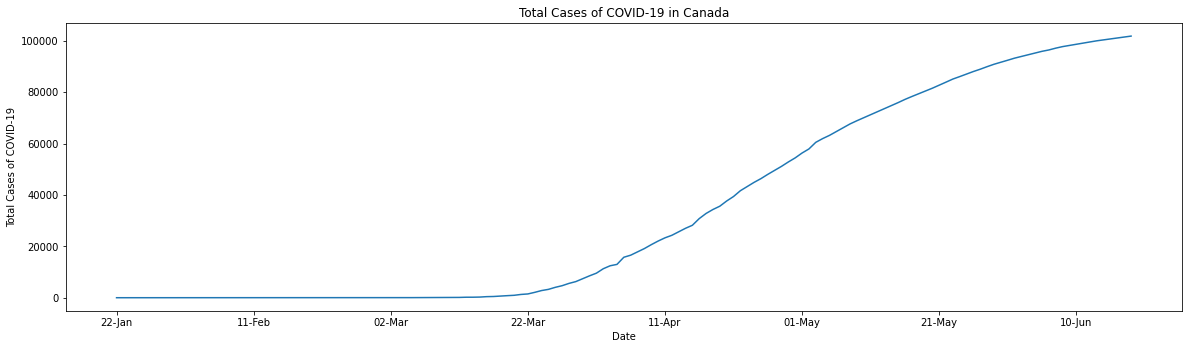

Index(['Afghanistan'], dtype='object', name='Countries')


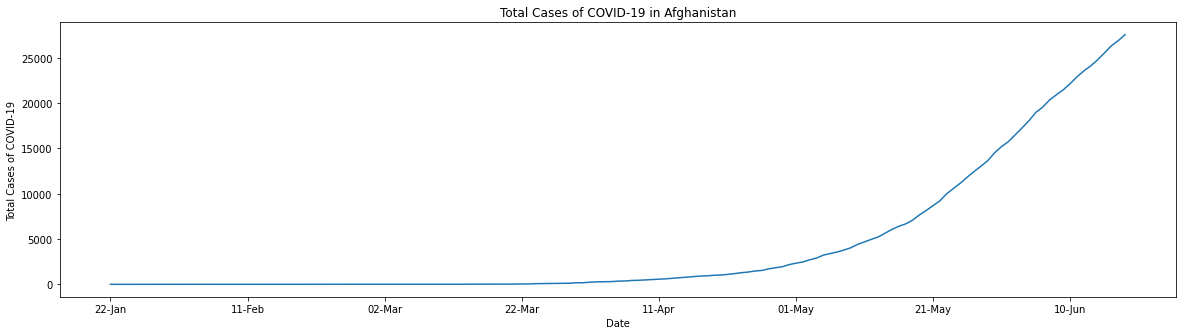

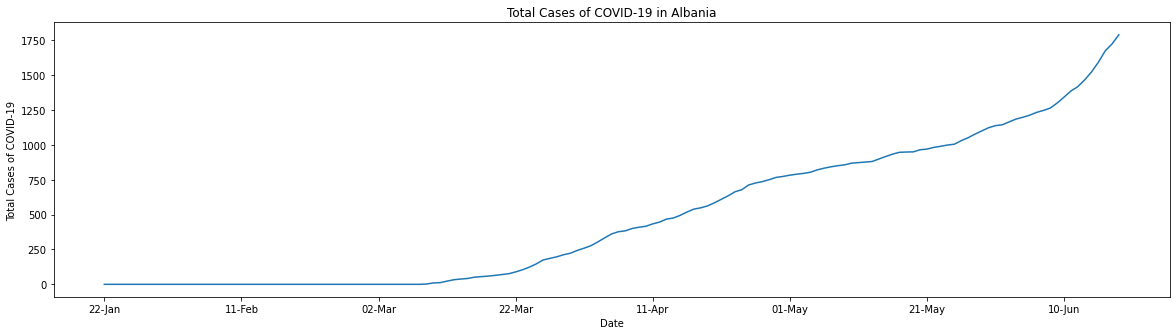

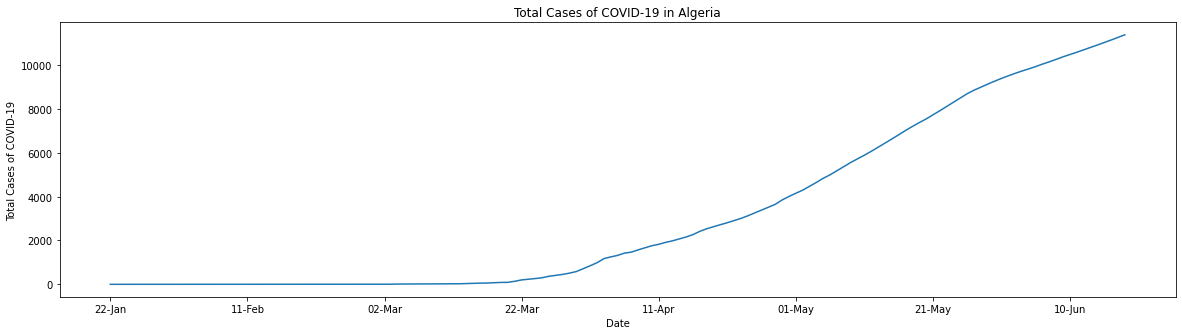

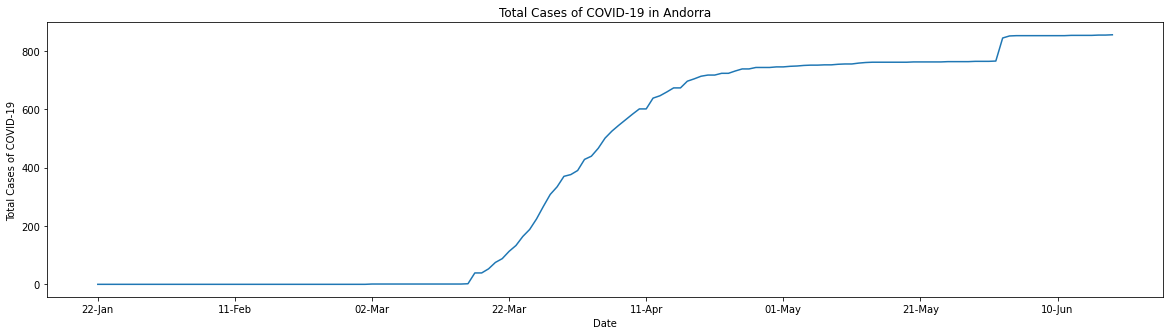

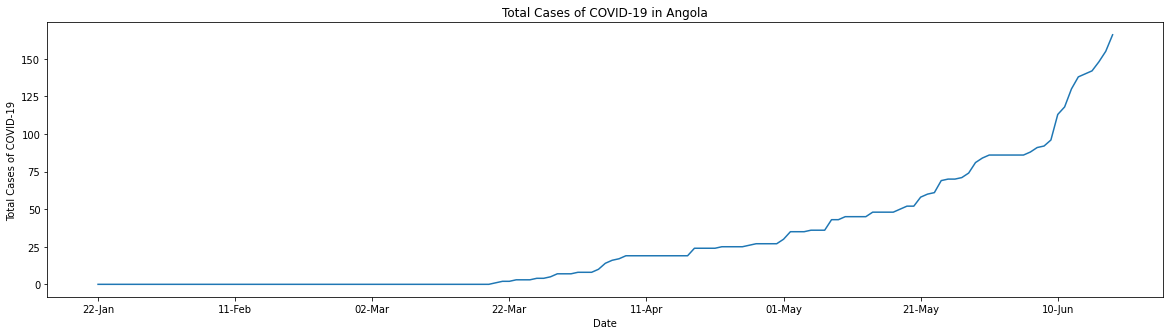

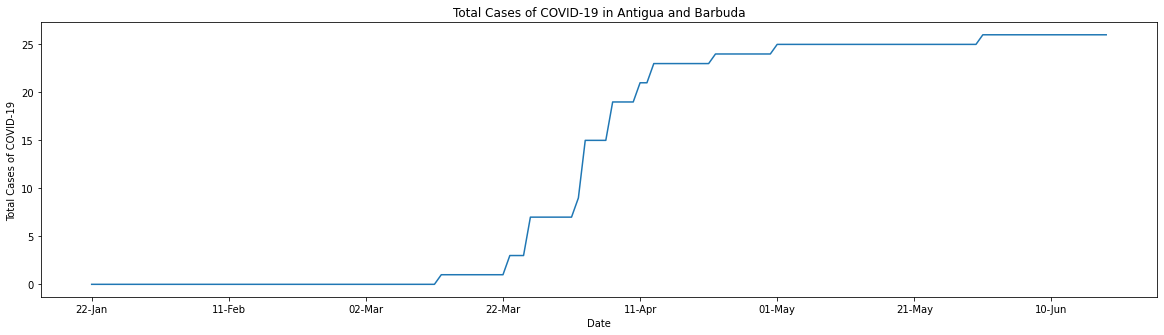

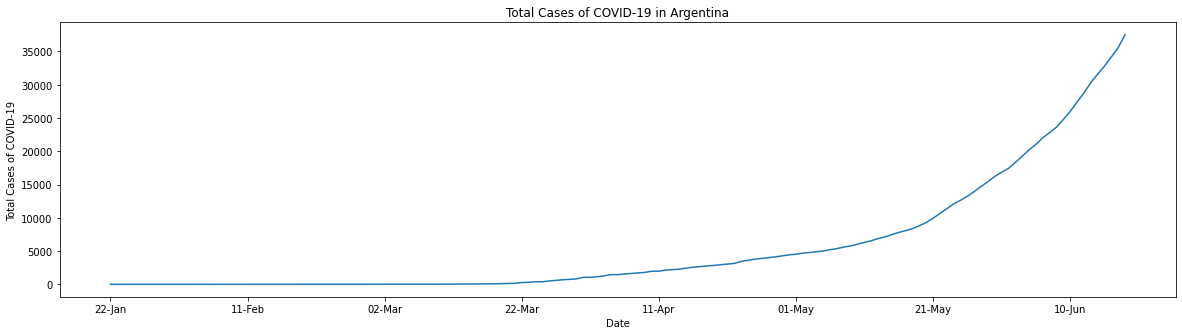

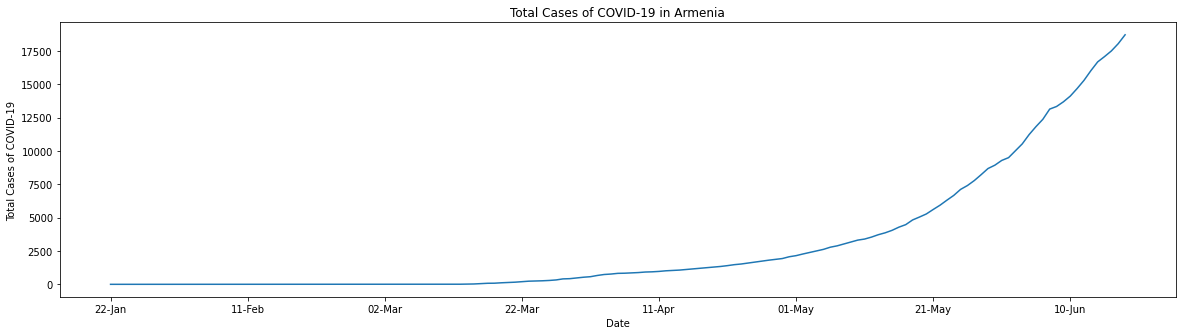

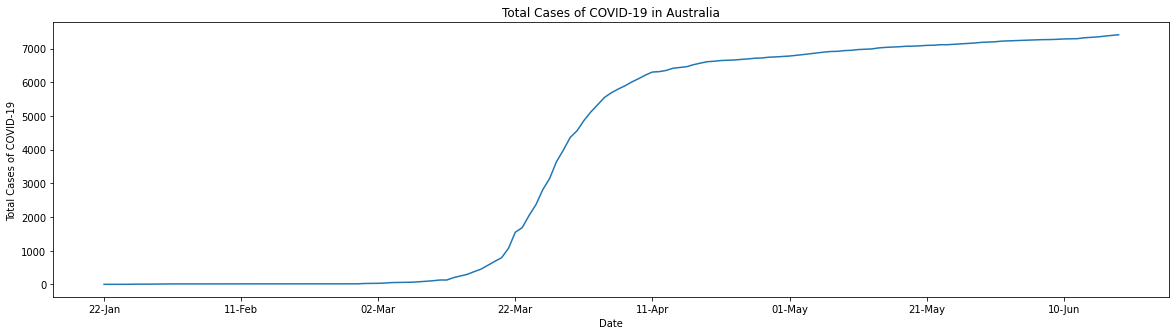

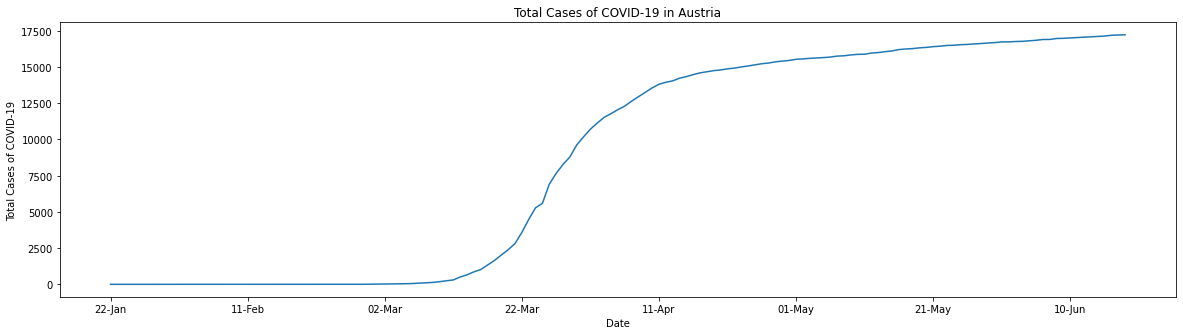

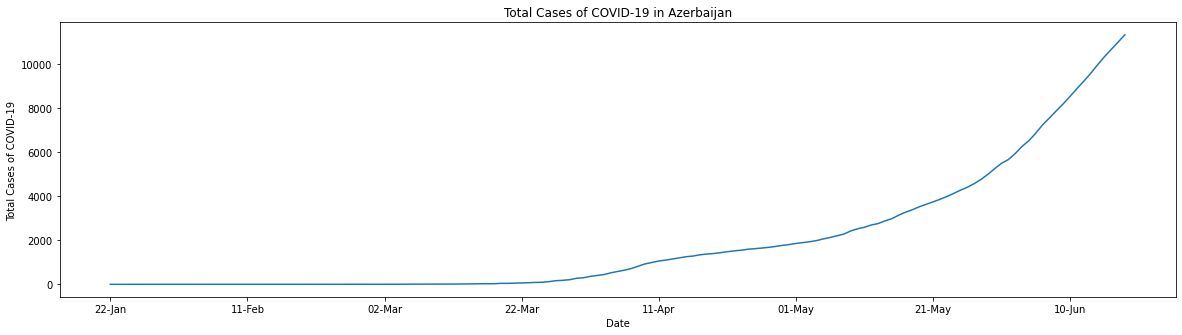

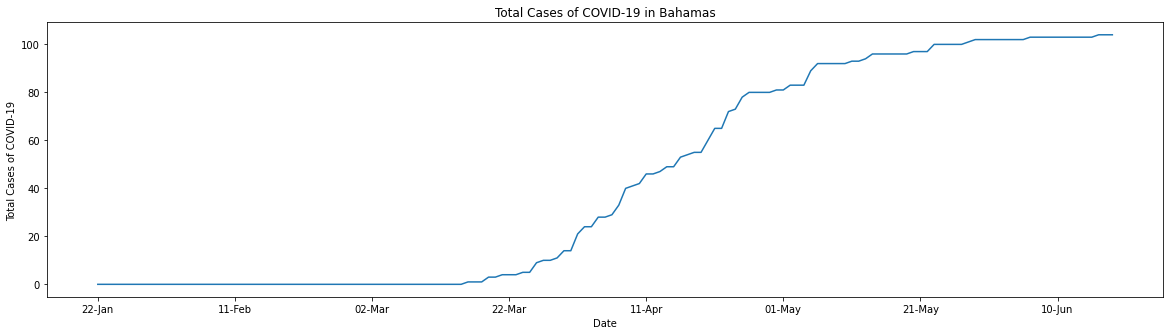

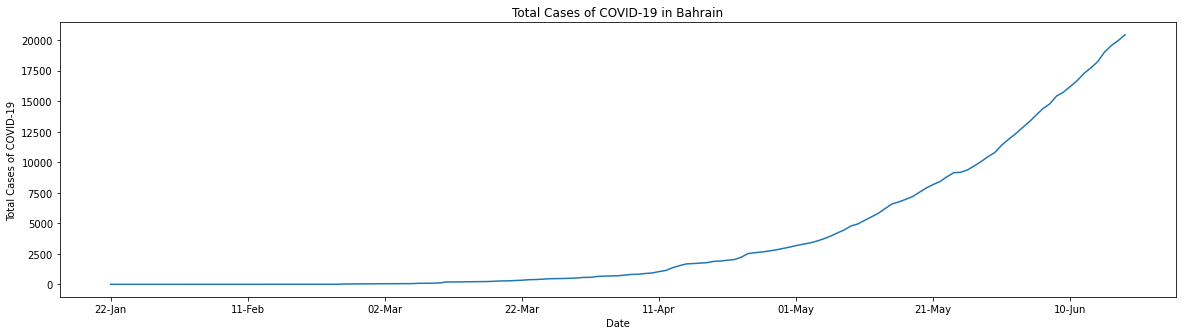

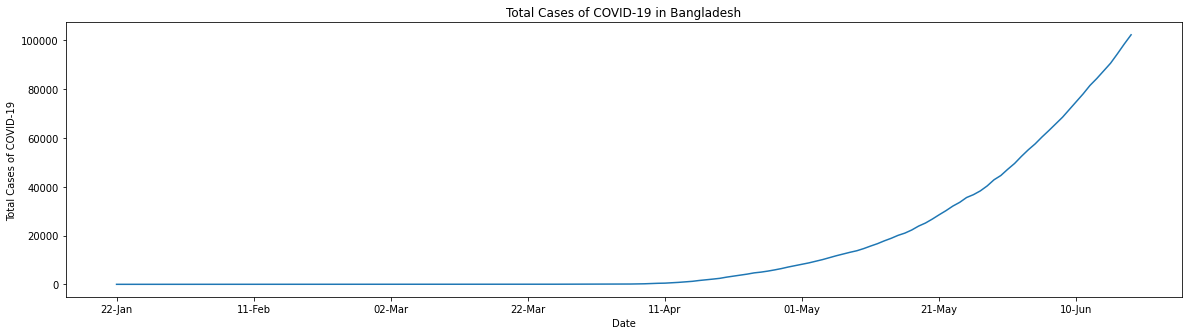

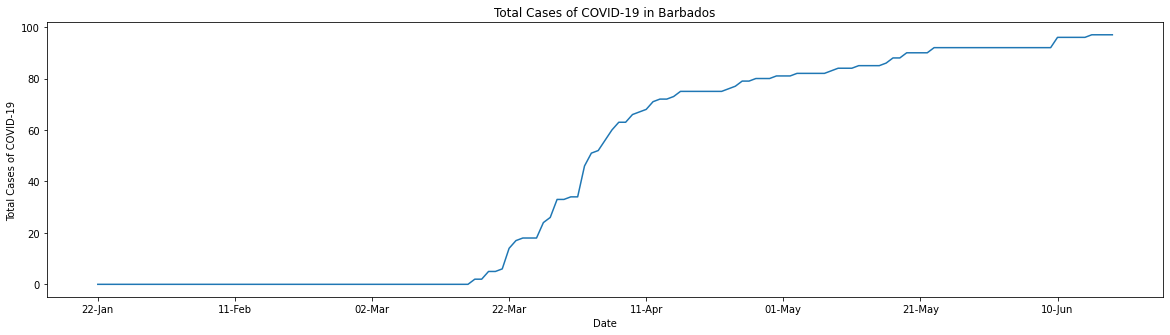

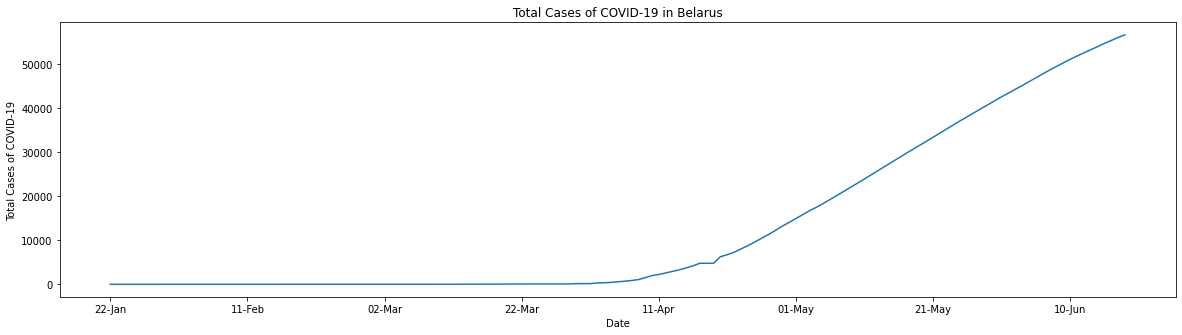

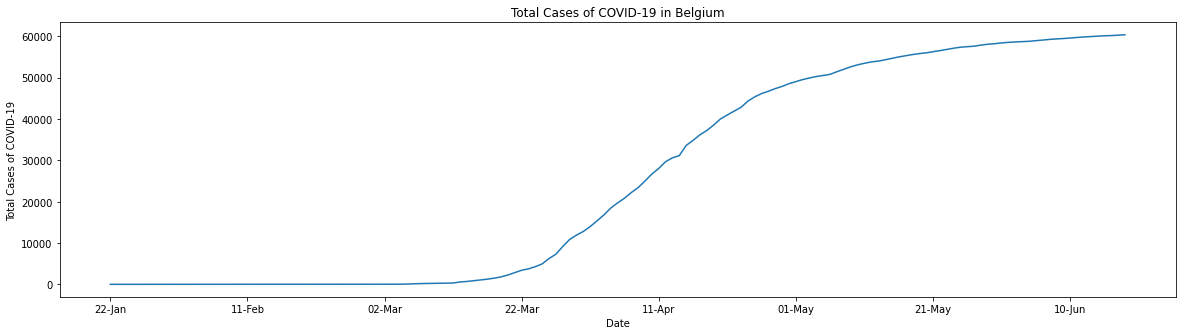

In [ ]:
## Plot time series for US, China and Canada and othee 17 countries
us = rawdf.loc['US']
china = rawdf.loc['China']
canada = rawdf.loc['Canada']
time = rawdf.columns[0:]

country = [us, china, canada]
country_list = ['US', 'China', 'Canada']
gs = gridspec.GridSpec(3,1)
tick_spacing = 20

for i, c in enumerate(country):
  plt.figure(figsize = (20,6*3))
  ax = plt.subplot(gs[i])
  plt.plot(time, c)
  ax.set_title('Total Cases of COVID-19 in ' + country_list[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Total Cases of COVID-19')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
  plt.show()

other = rawdf.iloc[0:17]
country_other = []
country_other_list = [other.index]
for i in range(1,18):
  country_other.append(other.iloc[i-1:i])
  country_other_list.append(other.index[i-1:i])
print(country_other_list[1])
gs = gridspec.GridSpec(17,1)
tick_spacing = 20
for i, c in enumerate(country_other):
  plt.figure(figsize = (20,6*17))
  ax = plt.subplot(gs[i])
  plt.plot(time, c.T)
  ax.set_title('Total Cases of COVID-19 in ' + other.index[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Total Cases of COVID-19')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
  plt.show()

In [ ]:
## Apply StandardScalar, each day should have a mean of zero and StD of 1.
name = rawdf.index
column = rawdf.columns
data = rawdf.values
data_std = StandardScaler().fit_transform(data)
#print(data_std[:,1])
df_std = pd.DataFrame(data_std, name, column)
#print(data_std[:,1].mean())
#print(data_std[:,1].var())

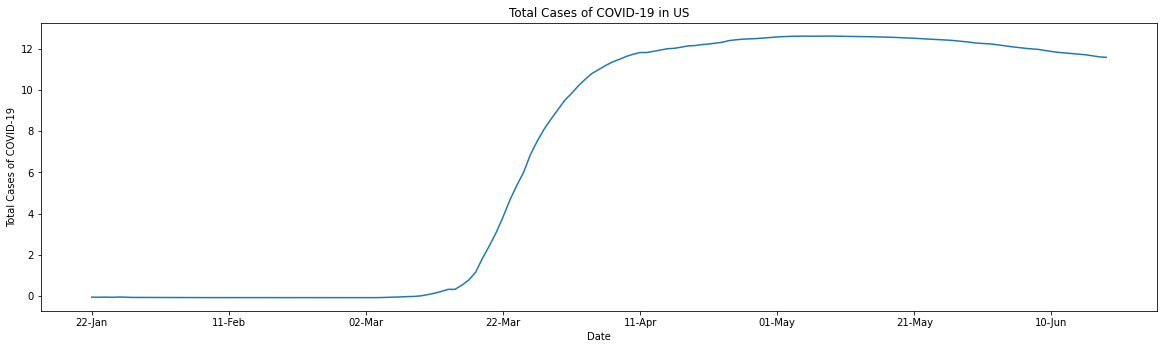

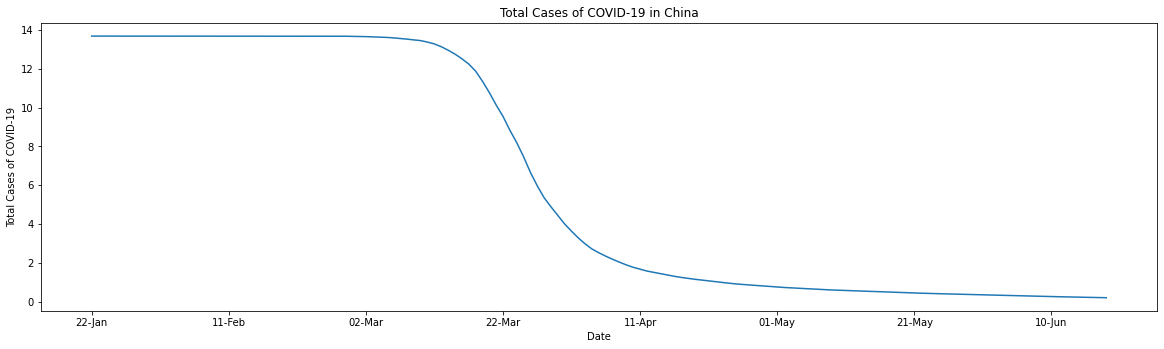

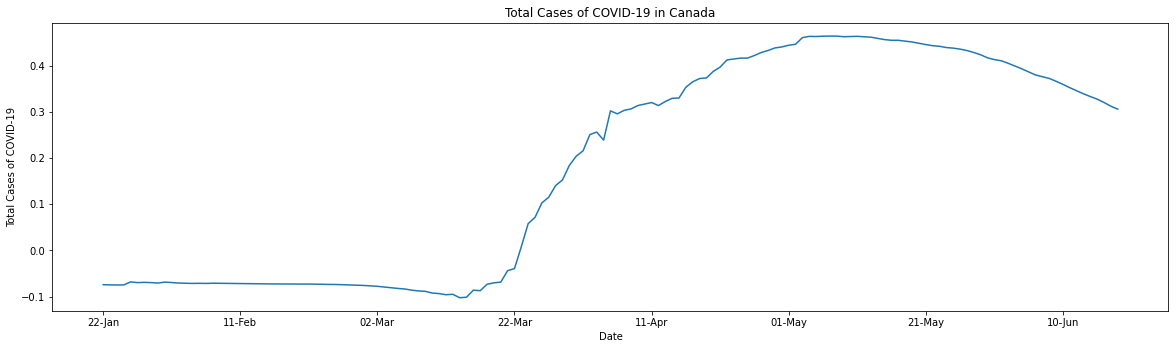

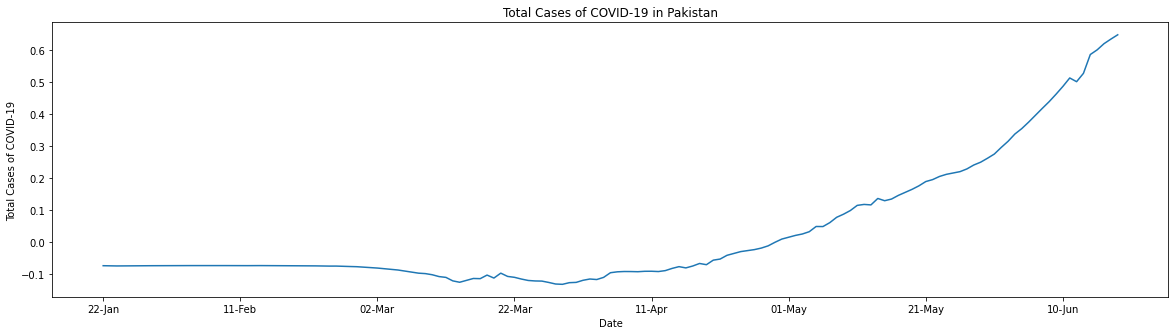

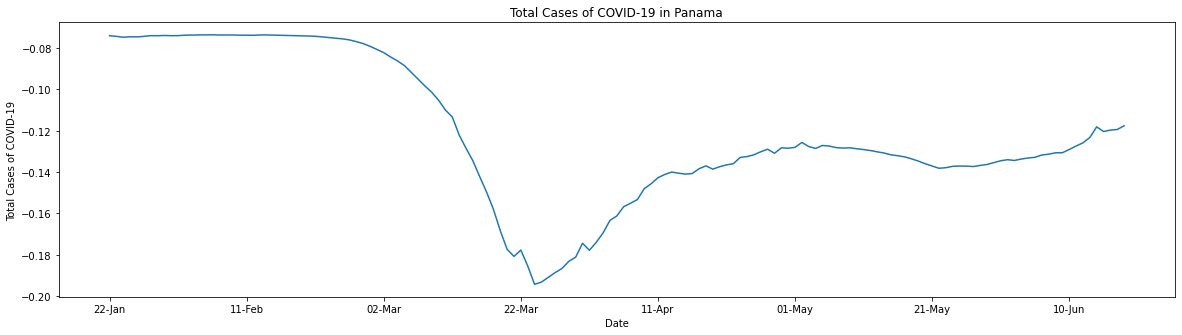

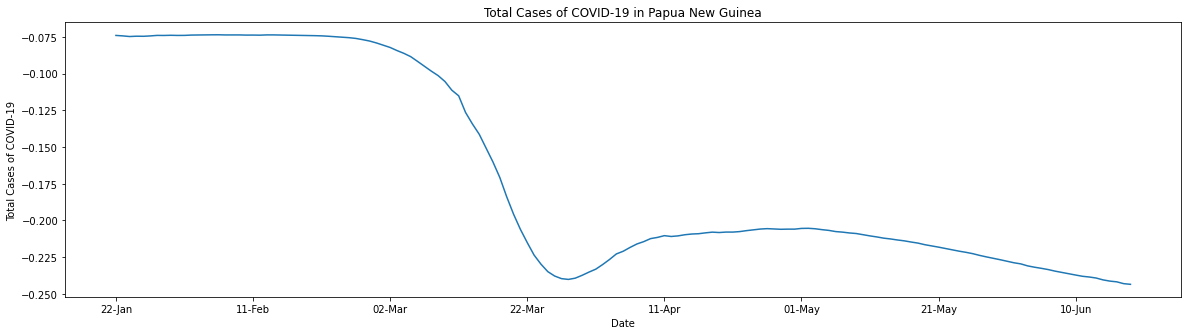

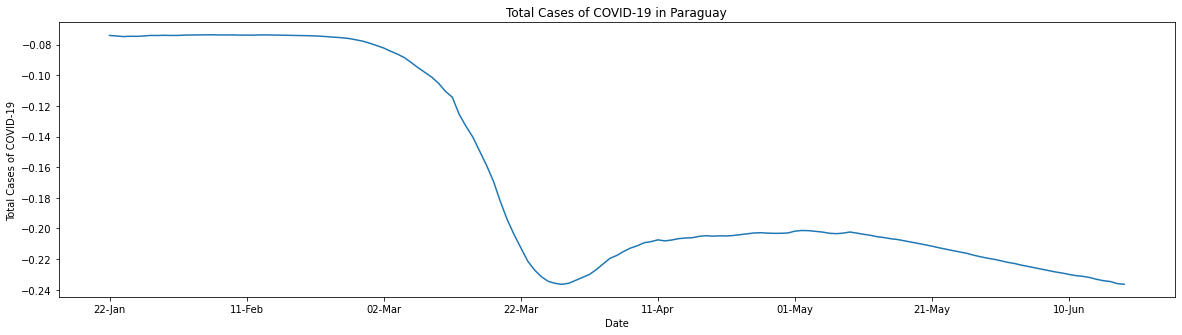

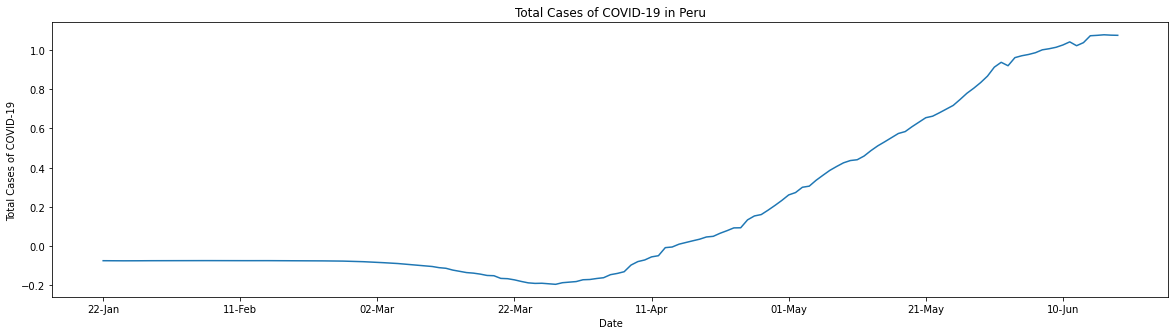

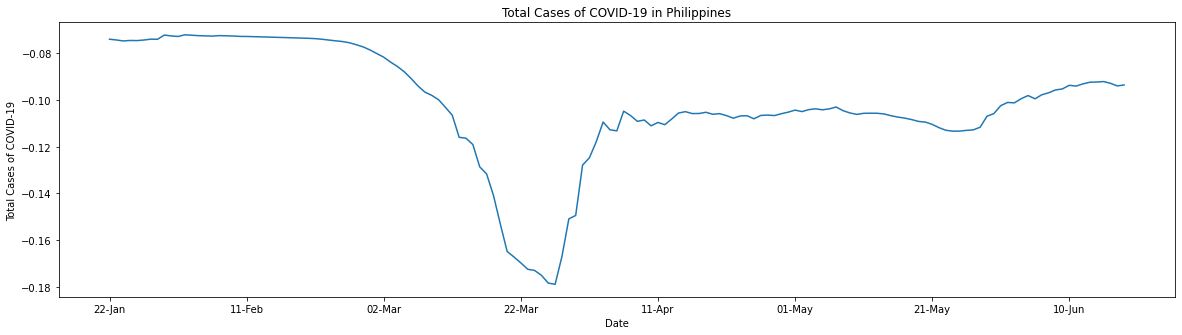

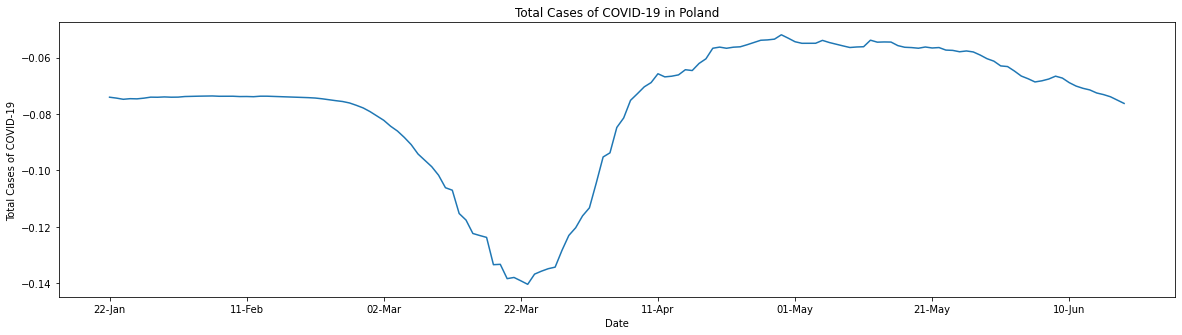

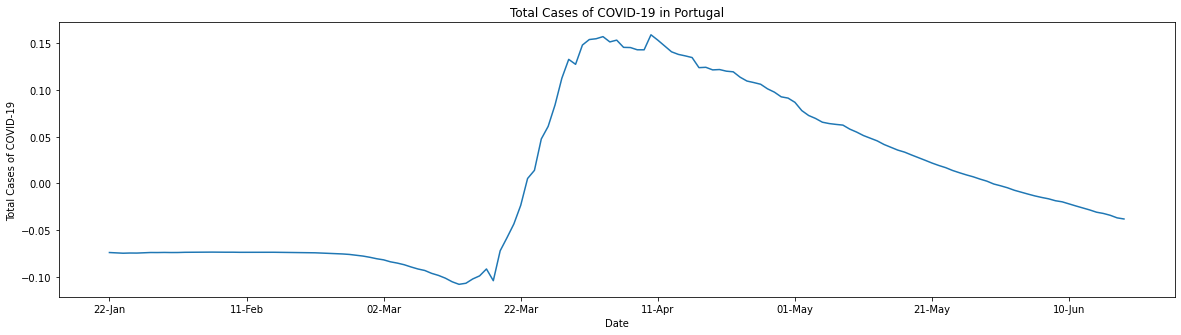

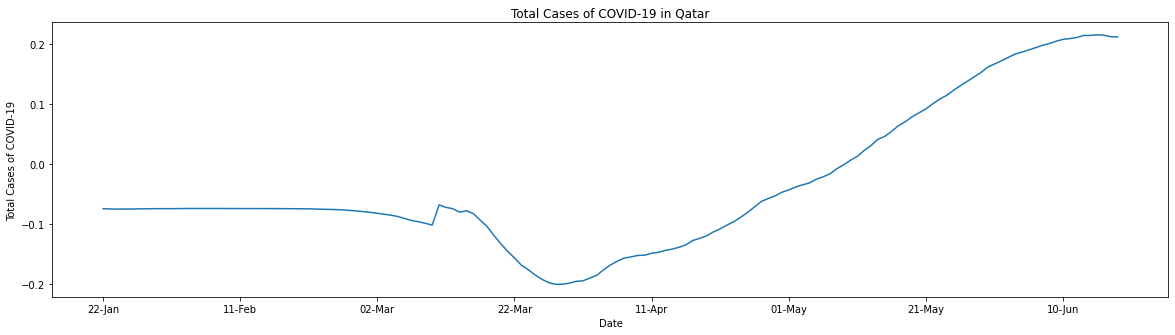

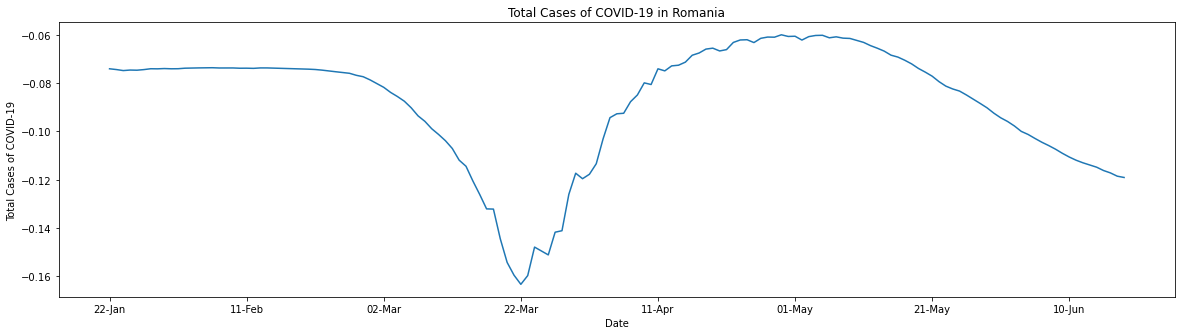

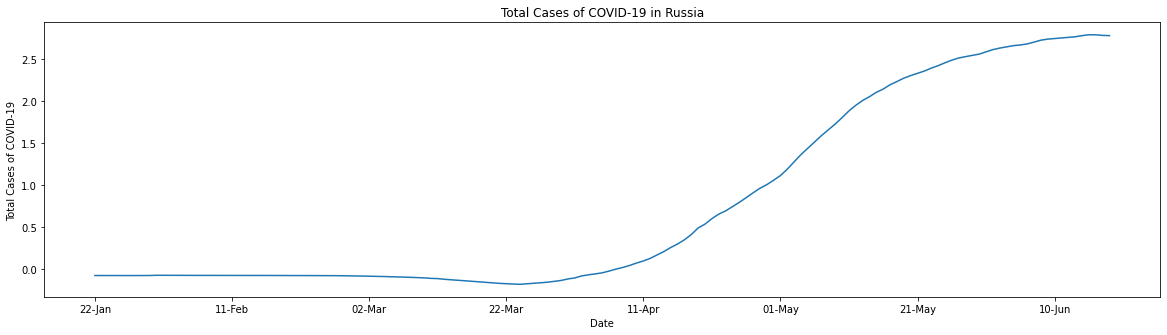

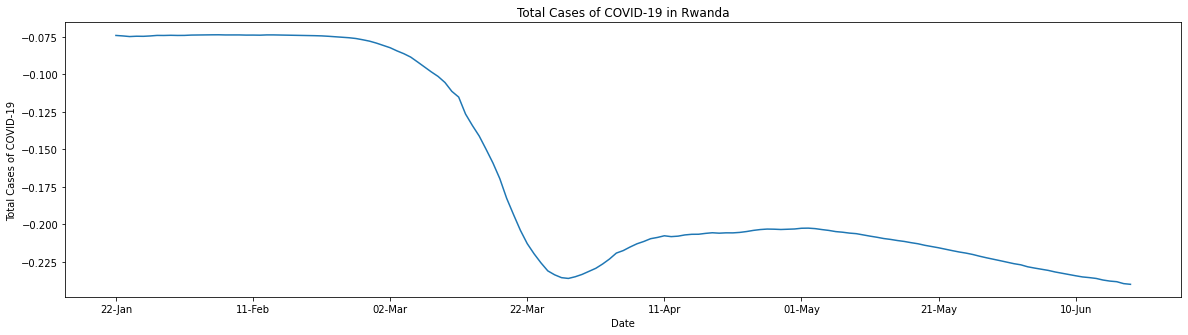

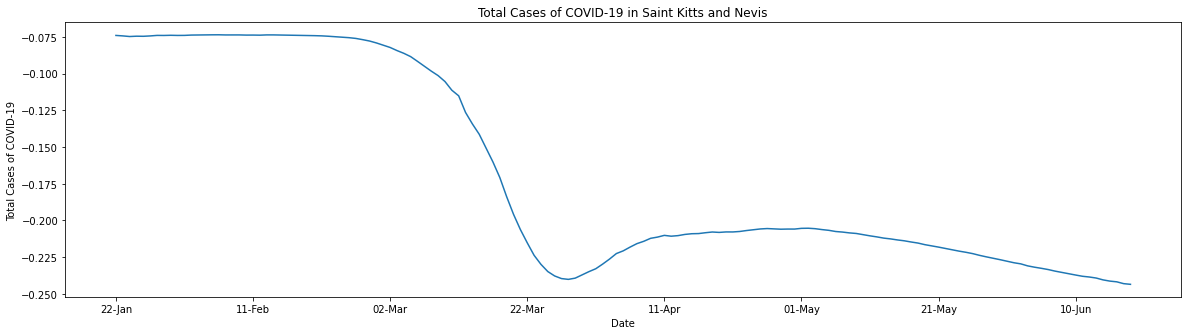

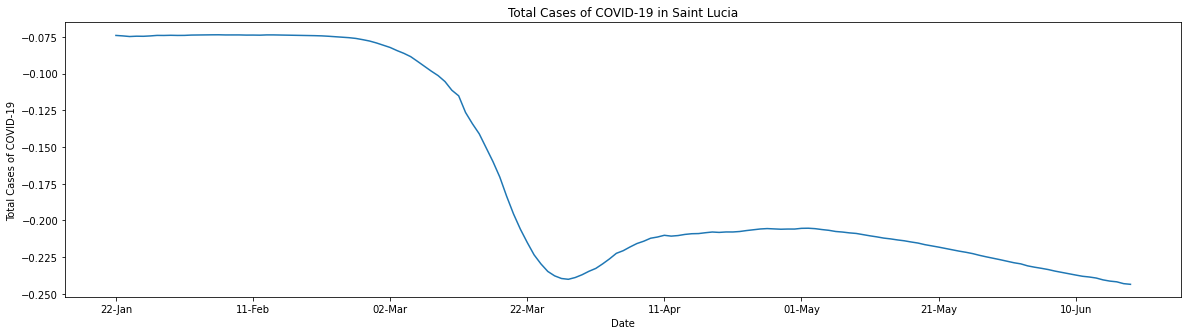

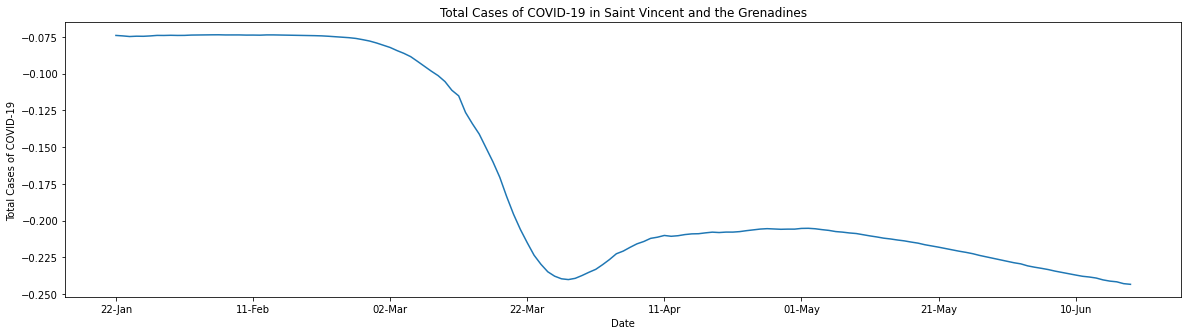

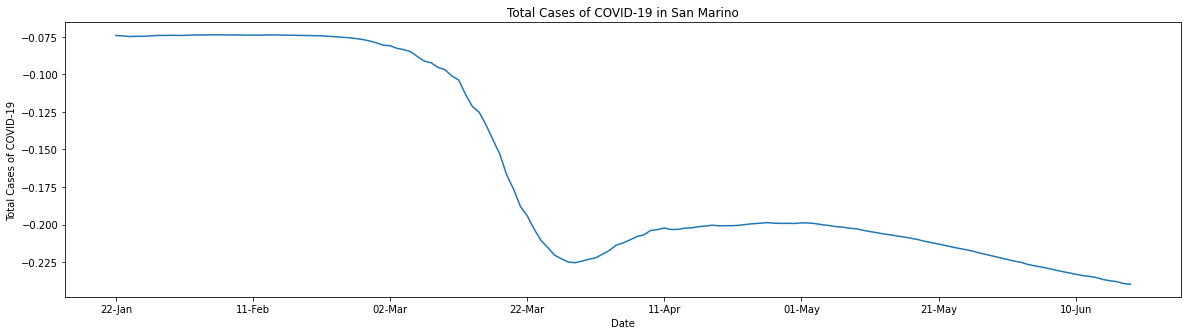

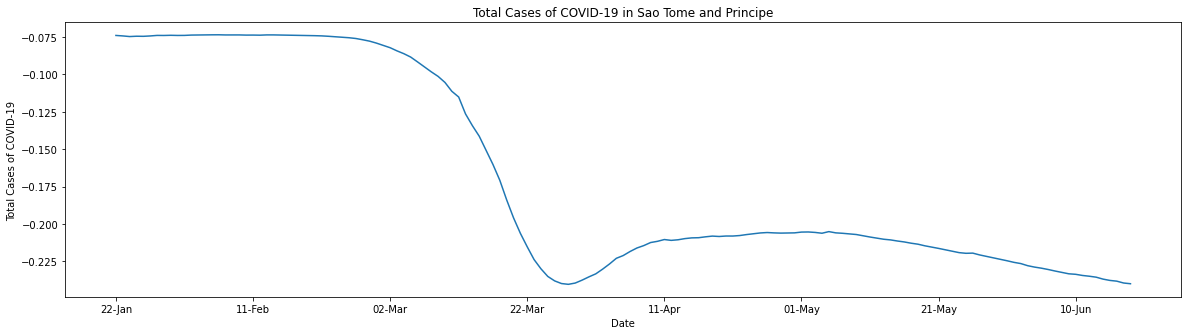

In [ ]:
## Plot the standardized time-series for the same countries in step 1.
us = df_std.loc['US']
china = df_std.loc['China']
canada = df_std.loc['Canada']
time = df_std.columns[0:]

country = [us, china, canada]
country_list = ['US', 'China', 'Canada']
gs = gridspec.GridSpec(3,1)
tick_spacing = 20

for i, c in enumerate(country):
  plt.figure(figsize = (20,6*3))
  ax = plt.subplot(gs[i])
  plt.plot(time, c)
  ax.set_title('Total Cases of COVID-19 in ' + country_list[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Total Cases of COVID-19')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
  plt.show()
  
other = df_std.iloc[130:147]
country_other = []
#country_other_list = [other.index]
for i in range(1,18):
  country_other.append(other.iloc[i-1:i])
  #country_other_list.append(other.index[i-1:i])

gs = gridspec.GridSpec(17,1)
tick_spacing = 20
for i, c in enumerate(country_other):
  plt.figure(figsize = (20,6*17))
  ax = plt.subplot(gs[i])
  plt.plot(time, c.T)
  ax.set_title('Total Cases of COVID-19 in ' + other.index[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Total Cases of COVID-19')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
  plt.show()

****
**Explain the trend of standardized time-series for the US, Canada, and China. Why does the curve goes up or down? What do negative and positive values mean?**

**Answer**: 

After standardized, COVID-19 cases in US starts to increase sharply around March 18 and keep increasing until approximately May 7, then slowly decrease until now. The total COVID-19 cases in US is much higher than the average level of the world.

In China, it shows a decrease progressively trend. At the beginning COVID-19 cases decrease slowly, until approximately March 12 the cases decrease dramatically. Around April 11 tend to be flatten. At beginning, the total cases in China is much higher than the averge level and gradually decline to the average level.

In Canada, there is a small drop between Jan 22 to approximately Mar 18, then continuously increase until May 4. After that shows a decrease trend. The total cases in Canada is always approach to the average cases of the world.

When the total COVID-19 cases in that country is higher than the average cases number of the world for several days, so the curve shows a upward trend. When the total cases in that country lower than the average cases number of the world for several days, the curve shows a downward trend.

Negative means the COVID-19 cases in that country is lower than the average level of the world and positve means higher than the average cases.
****



****
**What other patterns do you see in other countries? (e.g., oscillations, monotonic increase or decrease, other trends)**

**Answer:** 

From the above 17 plots, Raussia, Peru, Pakistan and Quatar they show monotonic increase approximately from March 22nd. 

For Portugal, there is a peak occurs around April 10th and then decrease.

For Romania, two peaks shows in that cohntry and a drop happens around March 22th, then back to the higher level. After that the curve decreases around May 10th. 

****

# Part 2: Applying PCA [6 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your Cov matrix should be (149, 149).*
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`.
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. How many PCs do you need to cover 99\% of the dataset's variance?
4. Show the first 10 principal components (Eigenvectors) plotted as a time series.
5. Based on your knowledge of the dataset contents, can you explain what any of the principal components might represent?

In [ ]:
## Compute the covariance matrix of the dataframe
## Compute eigenvalues and eigenvectors using np.linalg.eigh
n, m = df_std.shape 
C = np.dot(df_std.T, df_std) / (n-1) 
print('Shape of the covariance matrix of the Dataframe is', C.shape)
eigenValues, eigenVectors = np.linalg.eig(C)  
#print('Eigenvectors:\n ',eigenVectors, '\n Eigenvalues: \n', eigenValues)
#print('Shape of the eigenvalues is', eigenValues.shape, 'Shape of the eigenvector is', eigenVectors.shape)

Shape of the covariance matrix of the Dataframe is (149, 149)


Cumulative sum of expected varience [ 57.30798402  95.64802942  99.08533258  99.83723201  99.94536905
  99.97830001  99.98991249  99.99374769  99.9968342   99.99776703
  99.99832534  99.99870078  99.99901326  99.99928258  99.99945013
  99.99955893  99.99963809  99.99969479  99.99974002  99.99978182
  99.9998159   99.9998466   99.99987104  99.99989143  99.99990764
  99.99992313  99.99993384  99.99994206  99.99994888  99.99995556
  99.99996013  99.99996462  99.99996827  99.9999717   99.99997492
  99.99997775  99.99998042  99.99998269  99.9999846   99.99998632
  99.99998786  99.99998922  99.99999037  99.99999135  99.99999222
  99.999993    99.99999369  99.99999433  99.99999488  99.99999541
  99.99999586  99.99999626  99.99999658  99.9999969   99.99999717
  99.99999744  99.99999767  99.99999789  99.99999809  99.99999827
  99.99999844  99.99999859  99.99999872  99.99999885  99.99999895
  99.99999905  99.99999914  99.99999921  99.99999928  99.99999934
  99.9999994   99.99999945  99.99999949 

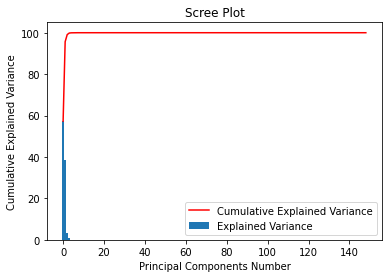

In [ ]:
## Scree plot
args = (-eigenValues).argsort() #large to small
eigenValues_sort = eigenValues[args]
eigenVectors_sort = eigenVectors[:, args]
eigValSum = sum(eigenValues_sort)
expVar = [eigV/eigValSum*100 for eigV in eigenValues_sort]
cumExpVar = np.cumsum(expVar)
print('Cumulative sum of expected varience', cumExpVar)
plt.bar(range(rawdf.shape[1]), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-', label='Cumulative Explained Variance')
plt.legend()
plt.xlabel('Principal Components Number')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

****
**How many PCs do you need to cover 99% of the dataset's variance?**

From above Scree Plot, three PCs can cover 99% of the dataset's variance.
****

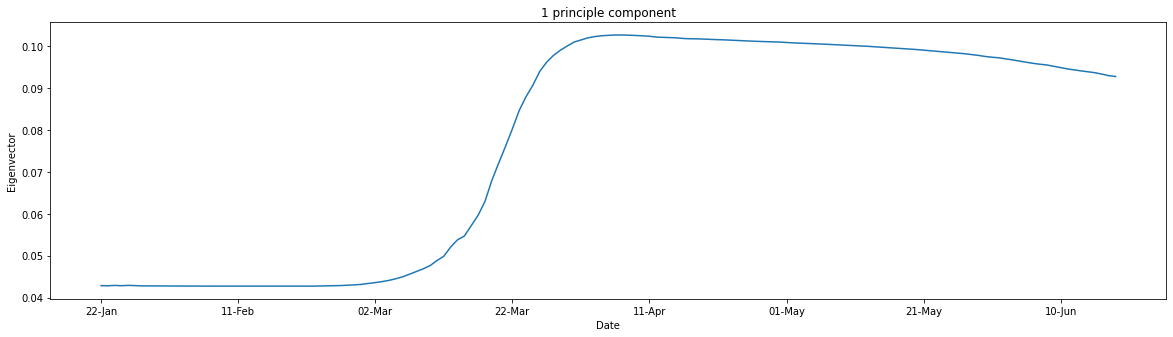

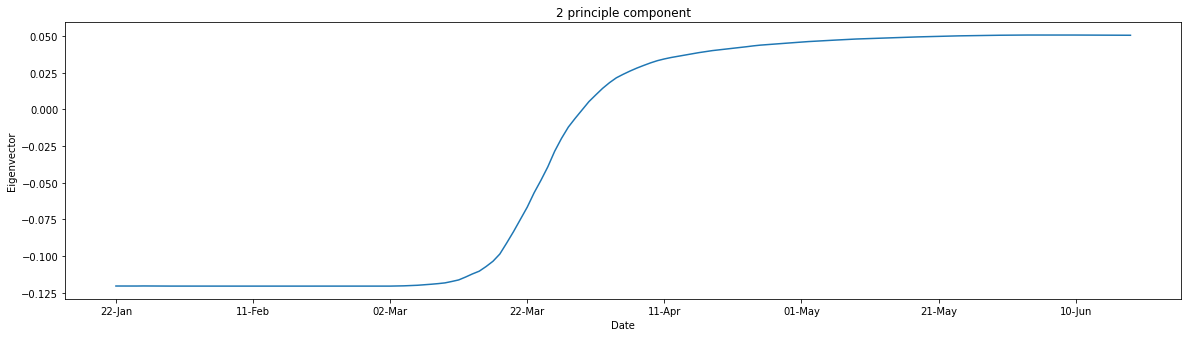

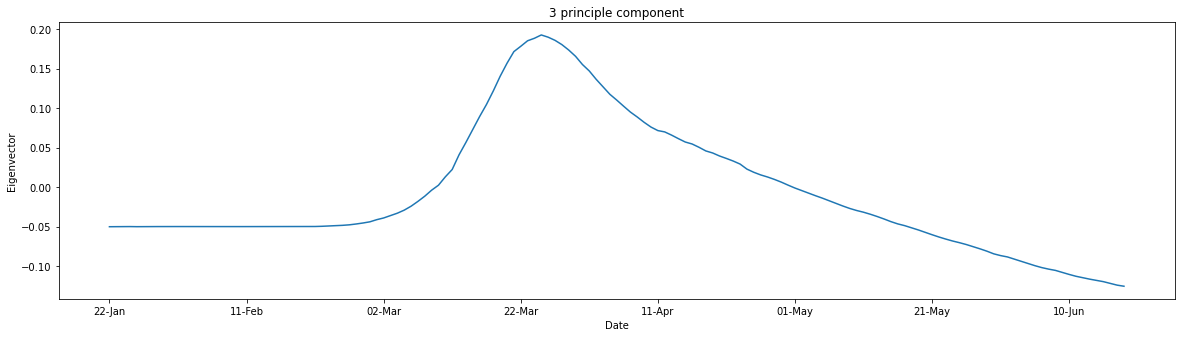

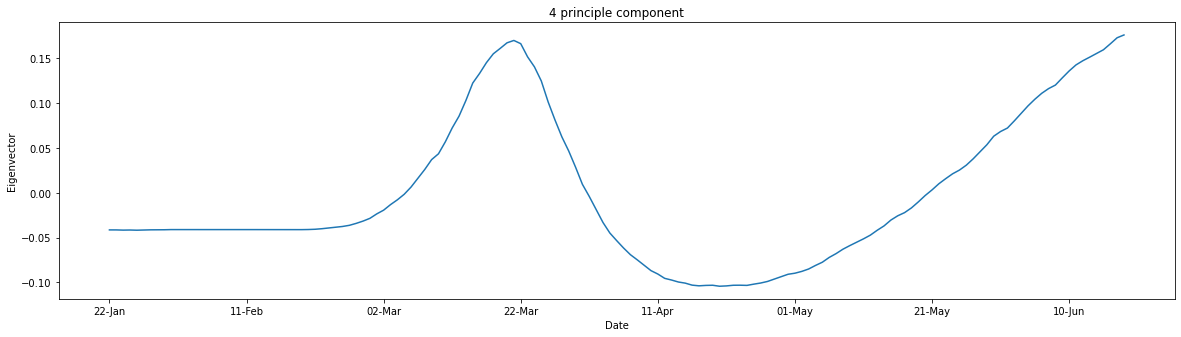

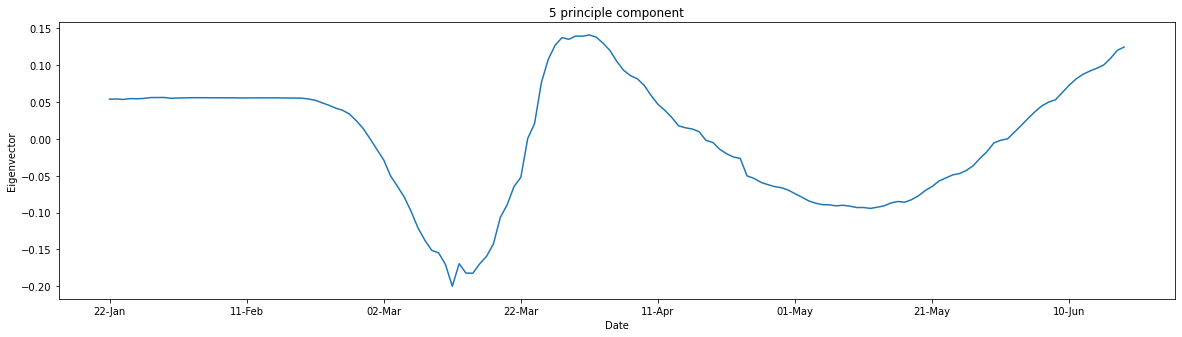

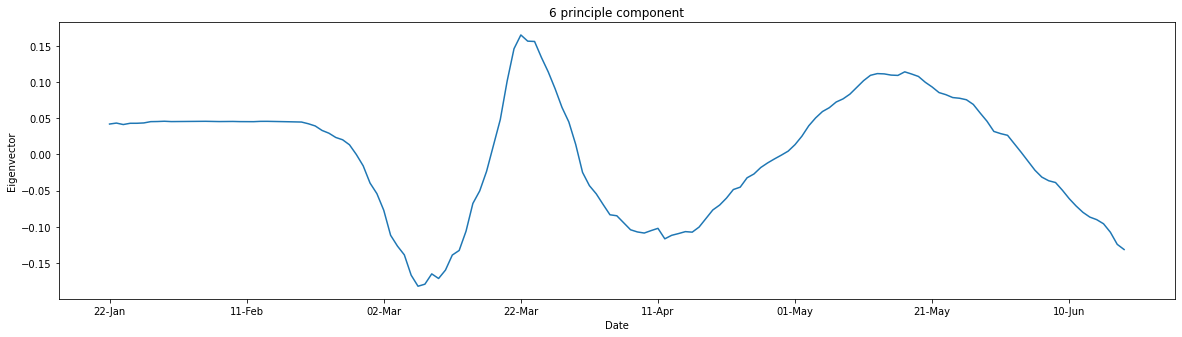

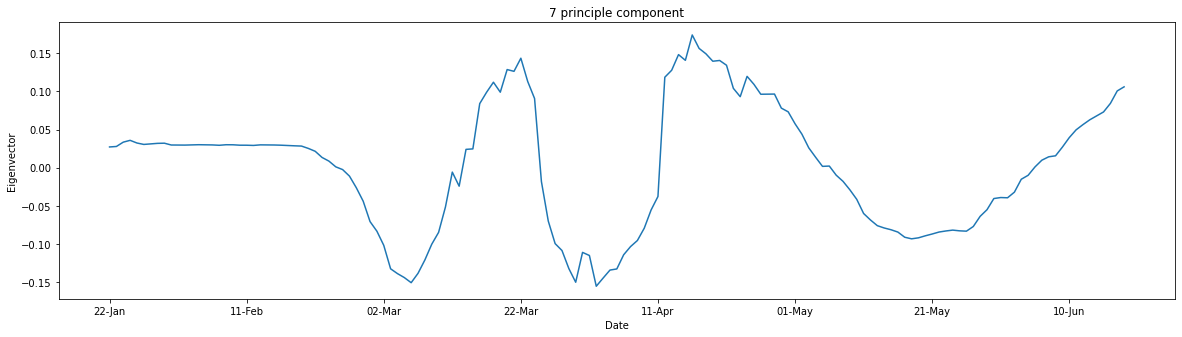

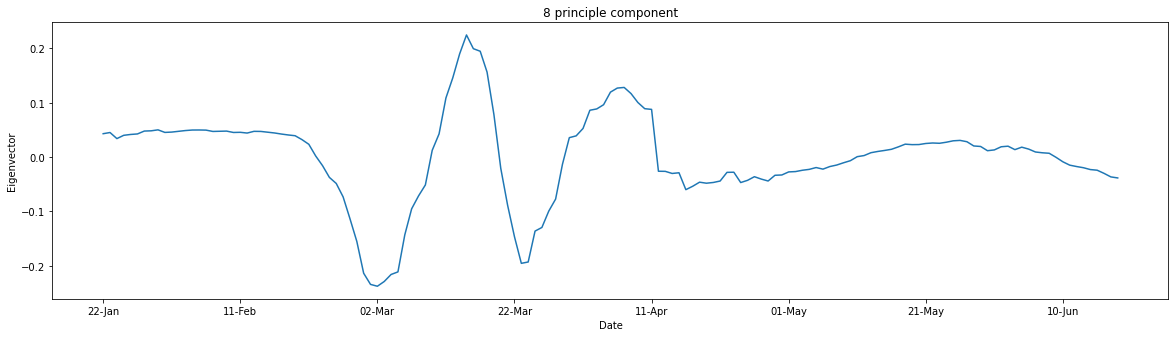

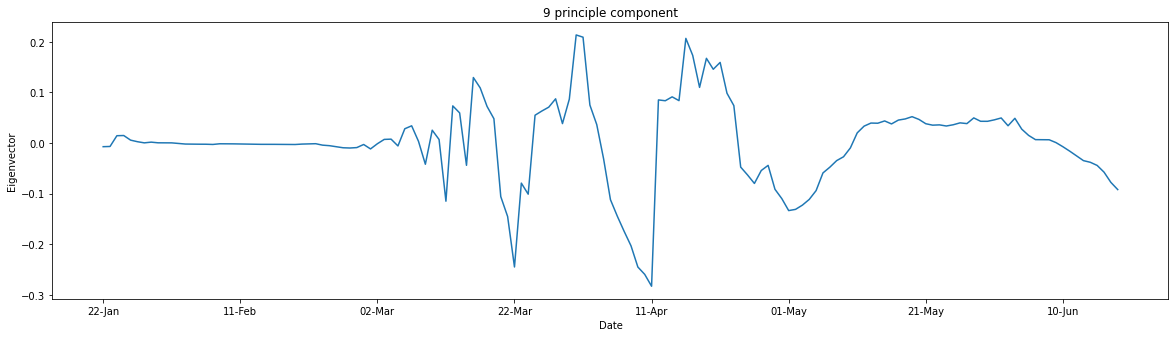

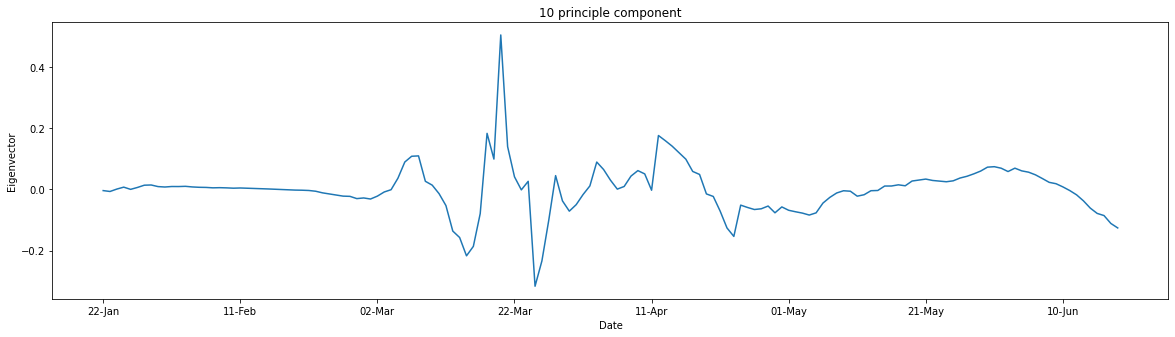

In [ ]:
## Show the first 10 principal components (Eigenvectors) plotted as a time series.
eigenVectors_10 = eigenVectors[:, args[0:10]]
gs = gridspec.GridSpec(10,1)
tick_spacing = 20

for i in range(0,10,1):
  plt.figure(figsize = (20,6*10))
  ax = plt.subplot(gs[i])
  plt.plot(time, eigenVectors_10[:,i])
  ax.set_title( str(i+1) + ' principle component')
  ax.set_xlabel('Date')
  ax.set_ylabel('Eigenvector')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
  plt.show()

****
**Based on your knowledge of the dataset contents, can you explain what any of the principal components might represent?**

**Answer**:

From above coding experience, the first principal component holds the largest eigenvalue which means the data has most variance and store more information. The correlated features contribute to the same principal component, each of the principal components represent a different set of of the correlated feature. Therefore we can reduce the original data features (dimensions) and using principal components to do the analyze to avoid suffering a great information loss.
****

# Part 3: Data reconstruction [6 Marks]

Implement a function that:


*   Accepts a country name as an input
*   Plots the standardized time-series for it. 
*   Shows the incremental reconstruction for the first 10 principal components (10 plots each showing the standard time-series and your reconstruction). 
*   For each incremental reconstruction step, plots the residual error of reconstruction compared to the original sample (standardized time-series) and a title that states the RMSE of the reconstruction.
* Computes how many PCs are needed so that RMSE would be less than 1\% of data reconstruction with only the first principal component. (e.g., if the RMSE for the first principal component is 4000, we want to know how many PC we need so that RMSE would be less than 40.)

To summarize, your function should print $1+10+10=21$ plots, and report the number of PCs to get less than 1\% RMSE error.

Test your function with the `US`, `Canada`, and `China`.



In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
def data_reconst(country_name):
  country_std = [df_std.loc[country_name]]
  plt.figure(figsize = (15,6*21))
  gs = gridspec.GridSpec(21,1)
  tick_spacing = 20
  ## Plots the standardized time-series for it.
  ax = plt.subplot(gs[0])
  plt.plot(time, np.array(country_std).T)
  ax.set_title('Total Cases of COVID-19 Using Original Data for ' + str(country_name))
  ax.set_xlabel('Date')
  ax.set_ylabel('Total Cases of COVID-19')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

  ## Shows the incremental reconstruction for the first 10 principal components
  for i in range(0,10,1):
    W = eigenVectors[:, 0:i+1]
    proj_df = np.dot(df_std, W)
    Recon_df = np.dot(proj_df, W.T)
    Recon_df = pd.DataFrame(Recon_df, name, column)
    country_recon = [Recon_df.loc[country_name]]
    ax = plt.subplot(gs[i+1])
    plt.plot(time, np.array(country_recon).T)
    ax.set_title('Total Cases of COVID-19 Using ' + str(i+1) + ' Principle Components to Reconstruct Data for ' + str(country_name) )
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Cases of COVID-19')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ## For each incremental reconstruction step, plots the residual error of reconstruction compared to the original sample 
    ## Title that states the RMSE of the reconstruction
    residual = []
    zip_object = zip(country_std, country_recon)
    for country_std_i, country_recon_i in zip_object:
      residual.append(country_std_i-country_recon_i)
    MSE = mean_squared_error(country_std, country_recon)
    RMSE = math.sqrt(MSE)
    ax = plt.subplot(gs[i+11])
    plt.plot(time, np.array(residual).T)
    ax.set_title('Residual Plot Using ' + str(i+1) + ' Principle Components to Reconstruct Data with RMSE ' + str(RMSE) + ' for ' + str(country_name))
    ax.set_xlabel('Date')
    ax.set_ylabel('Residual')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

  ## Computes how many PCs are needed so that RMSE would be less than 1%
  W = eigenVectors[:, 0:1]
  proj_df = np.dot(df_std, W)
  Recon_df = np.dot(proj_df, W.T)
  Recon_df = pd.DataFrame(Recon_df, name, column)
  country_recon = [Recon_df.loc[country_name]]
  residual = []
  zip_object = zip(country_std, country_recon)
  for country_std_i, country_recon_i in zip_object:
    residual.append(country_std_i-country_recon_i)
  MSE = mean_squared_error(country_std, country_recon)
  RMSE_1 = math.sqrt(MSE)

  for i in range(0,rawdf.shape[1],1):
    W = eigenVectors[:, 0:i+1]
    proj_df = np.dot(df_std, W)
    Recon_df = np.dot(proj_df, W.T)
    Recon_df = pd.DataFrame(Recon_df, name, column)
    country_recon = [Recon_df.loc[country_name]]
    residual = []
    zip_object = zip(country_std, country_recon)
    for country_std_i, country_recon_i in zip_object:
      residual.append(country_std_i-country_recon_i)
    MSE = mean_squared_error(country_std, country_recon)
    RMSE = math.sqrt(MSE)
    if RMSE < 0.01*RMSE_1:
      print((i+1), 'are needed so that RMSE would be less than 1% of the PC1 for', country_name)
      break


5 are needed so that RMSE would be less than 1% of the PC1 for US


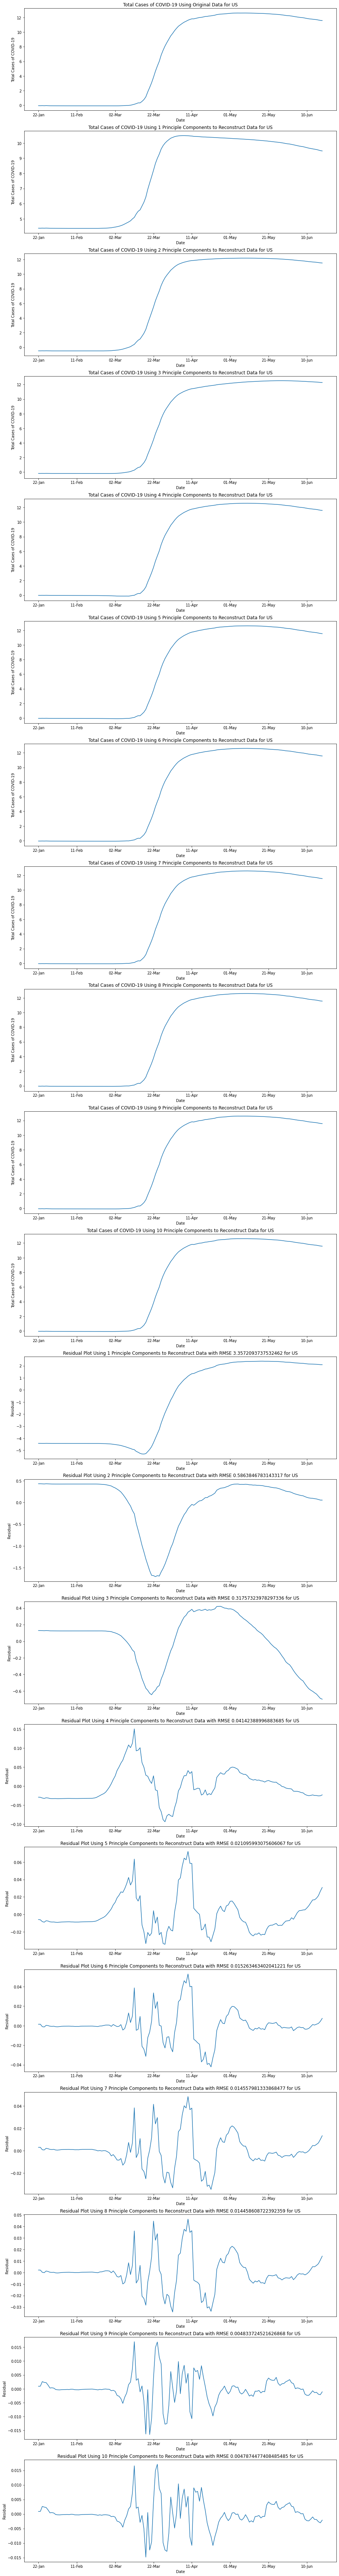

In [ ]:
## Test the function with the US
data_reconst('US')

3 are needed so that RMSE would be less than 1% of the PC1 for China


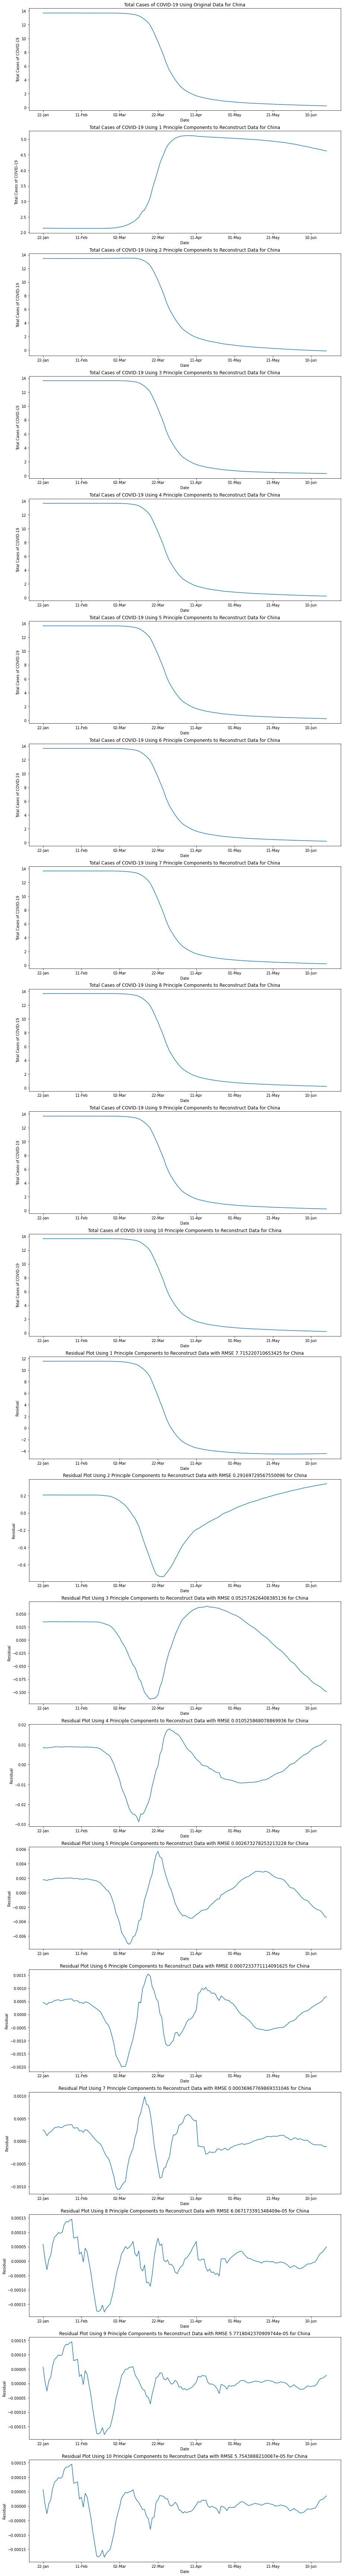

In [ ]:
## Test the function with the China
data_reconst('China')

27 are needed so that RMSE would be less than 1% of the PC1 for Canada


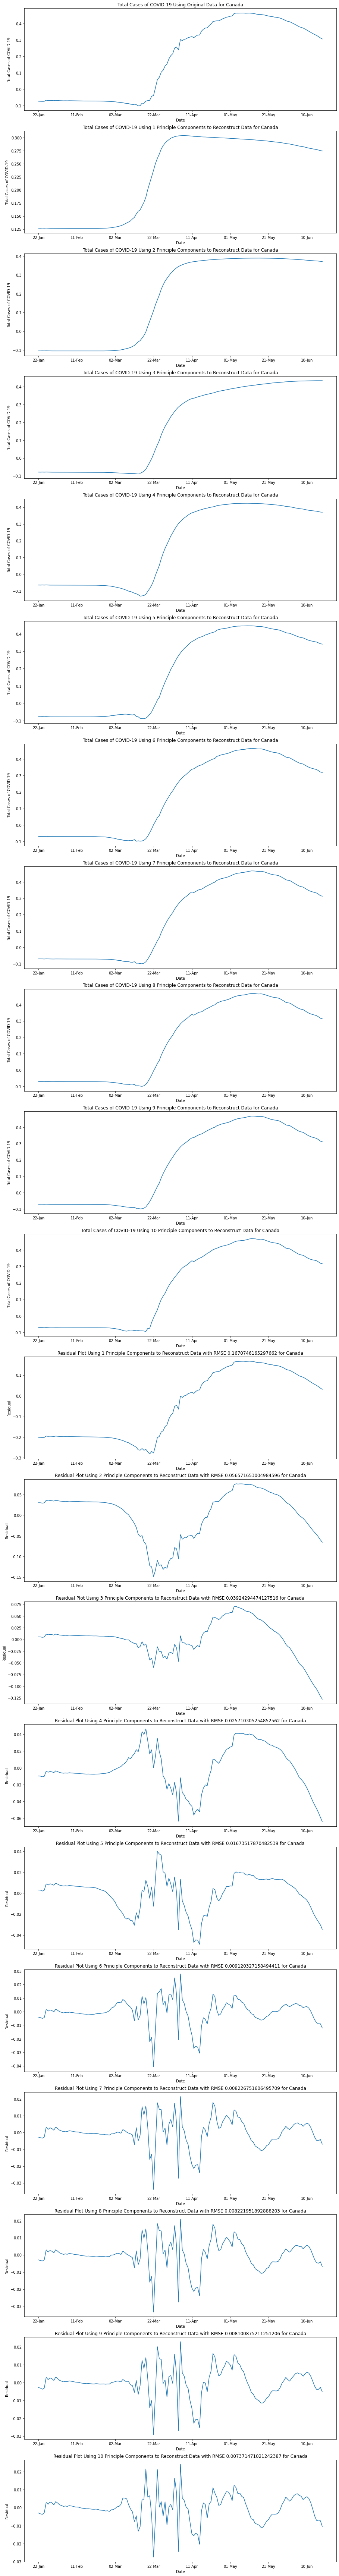

In [ ]:
## Test the function with the Canada
data_reconst('Canada')

****
**Computes how many PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component.**
* 5 are needed so that RMSE would be less than 1% of the PC1 for US

* 3 are needed so that RMSE would be less than 1% of the PC1 for China

* 27 are needed so that RMSE would be less than 1% of the PC1 for Canada

By adding more principle components, the reconstructed data is more approach to real data, but not much changing after adding the second component.
****

# Part 4: Predicting the future! [4 Marks]
Come up with a way to estimate the number of new cases in the near future (like a week) using PCA.


*   One suggestion: You already saw that the first few PCs are the most useful ones and their trend is not that random! Try to predict the eigenvector values for the near future and reconstruct the data based on them. 

*   Also, you can look for ideas/methods online or come up with your own.

* Predict the total cases for `Canada`, `Brazil`, and `Russia` by June 25th. 

* You can check the statistics in here: `https://www.worldometers.info/coronavirus/` and see how much your estimations are close to reality. 

* Welcome to the Data science world!



****
**Note:** 

For predicting the future one week COVID-19 data, I used the linear regression to fit the recent 5 days data's eigenvectors to predict the future 7 days eigenvectors. Then, using the PCA to reconstruct the predict data and compare with the true data from "worldmeters" website.

One drawback of the above method is the data is fit to a linear function, it cannot fit to the case growth for all countries. Especially, in some countries the daily cases may suddenly increase or decrease. The linear model can not predict these data well, therefore, for Brazil and Russia the RMSE are quite large.
****

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# rawdf:188*149 | progdf:188*10 | W:10*156 | recon:188*156
W = eigenVectors[:, 0:10]
W_pred = np.zeros((156,10))
for i in range(0,10,1):
  model = LinearRegression().fit(np.array(np.arange(0,5)).reshape(-1,1), eigenVectors_10[:,i][143:148].T)
  eigenvector_pred = model.predict(np.arange(0,7).reshape(-1,1))
  W_append = np.hstack((W[:,i],eigenvector_pred))
  W_pred[:,i] = W_append
proj_df_pred = np.dot(rawdf, W)
Recon_df_pred = np.dot(proj_df_pred, W_pred.T)
pred_date = ['19-Jun', '20-Jun', '21-Jun', '22-Jun', '23-Jun', '24-Jun', '25-Jun']
date_comb = np.append(column, pred_date)
Recon_df_pred = pd.DataFrame(Recon_df_pred, name, date_comb)
pred_canada = Recon_df_pred.loc['Canada'][149:156]
pred_brazil = Recon_df_pred.loc['Brazil'][149:156]
pred_russia = Recon_df_pred.loc['Russia'][149:156]

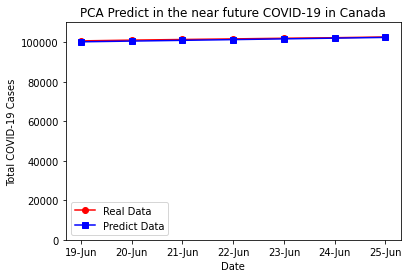

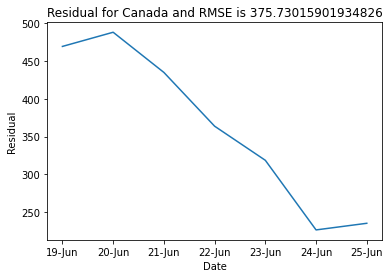

In [ ]:
## Predict Canada
real_data_canada = [100629, 101019, 101337, 101637, 101963, 102242, 102622]
real_canada = pd.DataFrame(real_data_canada, pred_date)
plt.plot(real_canada,'r-o', label = 'Real Data')
plt.plot(pred_canada, 'b-s', label = 'Predict Data')
plt.title('PCA Predict in the near future COVID-19 in Canada')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.ylim((0,110000))
plt.legend()
plt.show()
residual = real_canada[0]-pred_canada
MSE = mean_squared_error(real_canada, pred_canada)
RMSE = math.sqrt(MSE)
plt.plot(pred_date, np.array(residual))
plt.title('Residual for Canada and RMSE is ' + str(RMSE))
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

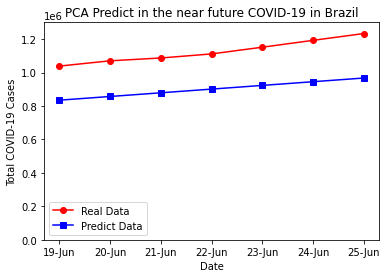

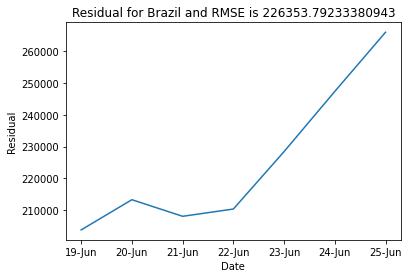

In [ ]:
## Predict Brazil
real_data_brazil = [1038568, 1070139, 1086990, 1111348, 1151479, 1192474, 1233147]
real_brazil = pd.DataFrame(real_data_brazil, pred_date)
plt.plot(real_brazil,'r-o', label = 'Real Data')
plt.plot(pred_brazil, 'b-s', label = 'Predict Data')
plt.title('PCA Predict in the near future COVID-19 in Brazil')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.ylim((0,1300000))
plt.legend()
plt.show()
residual = real_brazil[0]-pred_brazil
MSE = mean_squared_error(real_brazil, pred_brazil)
RMSE = math.sqrt(MSE)
plt.plot(pred_date, np.array(residual))
plt.title('Residual for Brazil and RMSE is ' + str(RMSE))
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

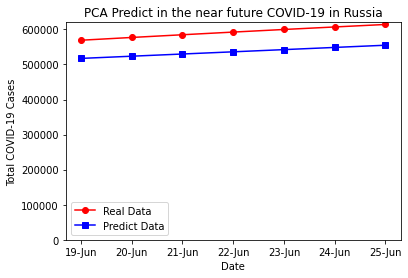

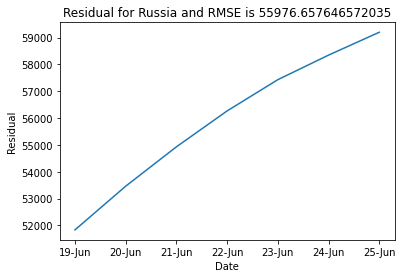

In [ ]:
## Predict Russia
real_data_russia = [569063, 576952, 584680, 592280, 599705, 606881, 613994]
real_russia = pd.DataFrame(real_data_russia, pred_date)
plt.plot(real_russia,'r-o', label = 'Real Data')
plt.plot(pred_russia, 'b-s', label = 'Predict Data')
plt.title('PCA Predict in the near future COVID-19 in Russia')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.ylim((0,620000))
plt.legend()
plt.show()
residual = real_russia[0]-pred_russia
MSE = mean_squared_error(real_russia, pred_russia)
RMSE = math.sqrt(MSE)
plt.plot(pred_date, np.array(residual))
plt.title('Residual for Russia and RMSE is ' + str(RMSE))
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


